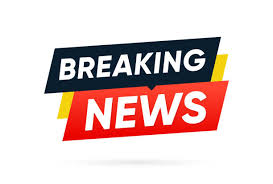

<p style="text-align: center; font-size: 30px;"><b>News Analysis</b></p>

# Imports and Data Preparation

<p style="font-size: 20px;"><b>Task 1</b></p>  
In order to calculate tf-idf scores for the articles in the news dataset, import `CountVectorizer`, `TfidfTransformer`, and `TfidfVectorizer` from `sklearn.feature_extraction.text`.

In [1]:
import pandas as pd
import numpy as np
from utils.articles import articles
from utils.preprocessing import preprocess_text
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

<p style="font-size: 20px;"><b>Task 2</b></p>  
Provided in `articles.py` is a selection of 10 articles from *The News International*. Each article is stored as a string in the list `articles`. In `script.py`, print one of the articles and read its contents.

In [2]:
print(articles[1])

HONG KONG:  Hong Kong shares opened 0.66 percent lower Monday following a tepid lead from Wall Street, as the first full week of the new year kicked off. The benchmark Hang Seng Index dipped 158.63 points to 23,699.19.


<p style="font-size: 20px;"><b>Task 3</b></p>  
Before proceeding, preprocess each article by performing tokenization and lemmatization using the `preprocess_text()` function from `preprocessing.py`. Store the processed articles in a list named `processed_articles`, and print one of the preprocessed articles.


In [3]:
processed_articles = [preprocess_text(article) for article in articles]

In [4]:
processed_articles[1]

'hong kong hong kong share open percent lower monday follow a tepid lead from wall street a the first full week of the new year kick off the benchmark hang seng index dip point to'

# Calculate Tf-idf Scores

<p style="font-size: 20px;"><b>Task 4</b></p>  
Initialize a `CountVectorizer` object and assign it to a variable named `vectorizer` to begin analyzing simple word counts for each article.


In [5]:
vectorizer = CountVectorizer()

<p style="font-size: 20px;"><b>Task 5</b></p>  
Fit and transform the `vectorizer` on `processed_articles` to obtain word counts for each article. Save the result to a variable named `counts`, then view the displayed DataFrame to examine the word counts for each article.

In [6]:
counts = vectorizer.fit_transform(processed_articles)

In [7]:
counts

<10x353 sparse matrix of type '<class 'numpy.int64'>'
	with 516 stored elements in Compressed Sparse Row format>

In [8]:
counts.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 2]], shape=(10, 353))

In [9]:
vectorizer.get_feature_names_out()

array(['abbasi', 'abide', 'about', 'accord', 'add', 'against', 'agency',
       'aggressive', 'aim', 'air', 'almost', 'also', 'an', 'and',
       'announce', 'apple', 'applicable', 'appropriate', 'approve',
       'approximately', 'area', 'around', 'arrive', 'at', 'australia',
       'away', 'bank', 'basically', 'basis', 'basket', 'be', 'become',
       'begin', 'beijing', 'benchmark', 'between', 'bloomberg', 'bogey',
       'book', 'bring', 'budget', 'build', 'bukhari', 'but', 'by',
       'cabinet', 'can', 'cane', 'capitalise', 'car', 'cent', 'central',
       'chalk', 'charge', 'china', 'chinese', 'cite', 'claim', 'cng',
       'commodity', 'commuter', 'compare', 'compress', 'consideration',
       'continue', 'cost', 'country', 'cricket', 'crush', 'cup',
       'currency', 'cut', 'day', 'dealer', 'decide', 'decision',
       'decline', 'decrease', 'delay', 'depreciation', 'device',
       'different', 'dip', 'direct', 'disclose', 'dollar', 'double',
       'down', 'drop', 'due', 'd

In [10]:
df = pd.DataFrame(counts.toarray(), columns=vectorizer.get_feature_names_out())
df

,abbasi,abide,about,accord,add,against,agency,aggressive,aim,air,...,will,with,within,witness,worker,world,would,year,yi,yuan
0,0,1,0,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,3,0,0,0,0
6,0,0,1,0,0,0,1,1,1,0,...,0,3,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,2,2


<p style="font-size: 20px;"><b>Task 6</b></p>  
Initialize a `TfidfTransformer` object with the keyword argument `norm=None` and assign it to a variable named `transformer`.


In [11]:
transformer = TfidfTransformer(norm=None)

In [12]:
feature_names = vectorizer.get_feature_names_out()

<p style="font-size: 20px;"><b>Task 7</b></p>  
Fit and transform the `transformer` on `counts` to convert the word counts into tf-idf scores for each article. Save the result to a variable named `tfidf_scores_transformed`, then view the displayed DataFrame to examine the tf-idf scores for each article.


In [48]:
articles_list = []
for i in range(1, len(articles)+1):
    articles_list.append("Article "+str(i))

In [49]:
tfidf_scores_transformed = transformer.fit_transform(counts)

df_tf_idf = pd.DataFrame(tfidf_scores_transformed.T.todense(), index=feature_names, columns=articles_list)
df_tf_idf

,Article 1,Article 2,Article 3,Article 4,Article 5,Article 6,Article 7,Article 8,Article 9,Article 10
abbasi,0.000000,0.000000,0.000000,2.704748,0.0,0.000000,0.000000,0.0,0.000000,0.000000
abide,2.704748,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
about,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.704748,0.0,0.000000,0.000000
accord,0.000000,0.000000,2.704748,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
add,2.299283,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.299283,0.000000
...,...,...,...,...,...,...,...,...,...,...
world,0.000000,0.000000,0.000000,0.000000,0.0,8.114244,0.000000,0.0,0.000000,0.000000
would,0.000000,0.000000,0.000000,2.299283,0.0,0.000000,0.000000,0.0,2.299283,0.000000
year,0.000000,2.704748,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
yi,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,5.409496


tfidf_scores_transformed

In [50]:
tfidf_scores_transformed.T.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [2.70474809, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 2.70474809, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         5.40949618],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         5.40949618]], shape=(353, 10))

In [51]:
articles_list = []
for i in range(1, len(articles)+1):
    articles_list.append("Article "+str(i))

<p style="font-size: 20px;"><b>Task 8</b></p>
Amazing! Now you have your tf-idf scores for each article. You want to confirm, however, that the TfidfTransformer gives the same results as directly using the TfidfVectorizer.  
Initialize a TfidfVectorizer object with keyword argument norm=None saved to a variable vectorizer.

In [52]:
vectorizer = TfidfVectorizer(norm=None)

<p style="font-size: 20px;"><b>Task 9</b></p>
Fit and transform your vectorizer on processed_articles to calculate the tf-idf scores for each article in one step. Save the resulting tf-idf scores to a variable named tfidf_scores.<br><br>
After you save the tf-idf scores to tfidf_scores, you will see another DataFrame appear in the browser component. View the DataFrame to see the tf-idf scores for each article.<br><br>
Do the tf-idf scores given by TfidfVectorizer look the same as those given by TfidfTransformer?

In [53]:
tfidf_scores = vectorizer.fit_transform(processed_articles)

In [54]:
df_tfidf_scores = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=articles_list)

In [55]:
df_tfidf_scores

,Article 1,Article 2,Article 3,Article 4,Article 5,Article 6,Article 7,Article 8,Article 9,Article 10
abbasi,0.000000,0.000000,0.000000,2.704748,0.0,0.000000,0.000000,0.0,0.000000,0.000000
abide,2.704748,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
about,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.704748,0.0,0.000000,0.000000
accord,0.000000,0.000000,2.704748,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
add,2.299283,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.299283,0.000000
...,...,...,...,...,...,...,...,...,...,...
world,0.000000,0.000000,0.000000,0.000000,0.0,8.114244,0.000000,0.0,0.000000,0.000000
would,0.000000,0.000000,0.000000,2.299283,0.0,0.000000,0.000000,0.0,2.299283,0.000000
year,0.000000,2.704748,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
yi,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,5.409496


<p style="font-size: 20px;"><b>Task 10</b></p>
Let’s confirm that the tf-idf scores given by TfidfTransformer and TfidfVectorizer are the same.<br><br>

In [56]:
if np.allclose(tfidf_scores_transformed.todense(), tfidf_scores.todense()):
  print(pd.DataFrame({'Are the tf-idf scores the same?':['YES']}))
else:
  print(pd.DataFrame({'Are the tf-idf scores the same?':['No, something is wrong :(']}))

  Are the tf-idf scores the same?
0                             YES


# Analyze the Results

<p style="font-size: 20px;"><b>Task 11</b></p>
A simple way of identifying the “topic” of a document is to label the document with its highest-scoring tf-idf term. While this is a more naive approach than others, it is a quick and easy way of getting insight into the topic of a document.<br><br>
Scroll down to the bottom of script.py, and begin by writing a for loop that iterates a variable i through the values 1 to 10.

In [57]:
for i in range(1,10):
    pass

<p style="font-size: 20px;"><b>Task 12</b></p>
The Pandas Series method .idxmax() is a helpful tool for returning the index of the highest value in a DataFrame column. We will use this method to find the highest scoring tf-idf term for each article.<br><br>
Within the for loop, paste the following code:<br><br>
print(df_tf_idf[[f'Article {i}']].idxmax())<br><br>
On each pass through the for loop, this code will print the index of the term with the highest tf-idf score for that article (from Article 1 to Article 10).<br><br>
Compare the actual text of the articles to the selected term. Do printed terms give you any insight into the topic of the respective articles?

In [60]:
for i in range(1, len(articles_list)+1):
    print(df_tf_idf[[f'Article {i}']].idxmax())

Article 1    fare
dtype: object
Article 2    hong
dtype: object
Article 3    sugar
dtype: object
Article 4    petrol
dtype: object
Article 5    engine
dtype: object
Article 6    australia
dtype: object
Article 7    car
dtype: object
Article 8    railway
dtype: object
Article 9    cabinet
dtype: object
Article 10    china
dtype: object


# Final Remarmks

In this notebook, you successfully:

Imported and prepared a real-world dataset of news articles

Applied text preprocessing (tokenization & lemmatization) to clean the data

Calculated word frequencies using CountVectorizer

Converted word counts into tf-idf scores using two different methods:

TfidfTransformer

TfidfVectorizer

Verified that both methods produce the same results

Identified the most relevant term (topic indicator) for each article using .idxmax()

This workflow gave you a first practical taste of document-level text analysis.
Although this method is simple, it can already reveal meaningful patterns across documents.